In [1]:
#Import the minimum necessary to read from .csv and create a decision tree and random forest model
import pandas as pd
import numpy as np
import random as rnd
import sklearn
import csv
from sklearn.ensemble import RandomForestClassifier
# Import stringIO
from io import StringIO
import graphviz
from sklearn.model_selection import cross_val_score

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from numpy import polyfit
# from pyspark.sql import SparkSession
# from pyspark import SparkContext,SparkConf,SQLContext
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.regression import LinearRegression
# from pyspark.ml.evaluation import RegressionEvaluator
# conf = SparkConf().setMaster('local').setAppName('ML_learning')
# sc = SparkContext(conf=conf)
# sqlcontext = SQLContext(sc)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import polyfit
from pyspark.sql import SparkSession
from pyspark import SparkContext,SparkConf,SQLContext

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

#import neural network libraries
from sklearn.neural_network import MLPClassifier



In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [5]:
#Import training and test data
train_df = pd.read_csv('trainD.csv')
test_df = pd.read_csv('testD.csv')
#train_df = pd.read_csv('chess12combo.csv')
#test_df = pd.read_csv('chess12combo2.csv')
combine = [train_df, test_df]

In [6]:
train_df.describe()

whiteElo       blackElo  numLegalMoves      numQueens  \
count  699999.000000  699999.000000  699999.000000  699999.000000   
mean     2400.553151    2421.558785      38.296830       1.870280   
std        63.246998     103.167794       8.344041       0.377789   
min      2251.000000    2200.000000       0.000000       0.000000   
25%      2356.000000    2357.000000      34.000000       2.000000   
50%      2413.000000    2424.000000      39.000000       2.000000   
75%      2448.000000    2479.000000      43.000000       2.000000   
max      2500.000000    3009.000000      70.000000       3.000000   

            numPawns       bishPair     knightPair       rookPair  \
count  699999.000000  699999.000000  699999.000000  699999.000000   
mean       13.371725       3.410572       3.576102       3.042717   
std         1.490086       1.749147       1.746008       0.602046   
min         7.000000       0.000000       0.000000       0.000000   
25%        12.000000       3.000000       3.000000       3.000000   
50%        14.000000       3.000000       3.000000       3.000000   
75%        14.000000       4.000000       4.000000       3.000000   
max        16.000000       7.000000       7.000000       7.000000   

            whitePtV       blackPtV        ptVDiff        whiteCR  \
count  699999.000000  699999.000000  699999.000000  699999.000000   
mean       32.929450      33.343602      -0.414152       1.733281   
std         4.311608       4.193951       1.489622       0.605648   
min         5.000000       7.000000     -31.000000       0.000000   
25%        31.000000      32.000000      -1.000000       2.000000   
50%        34.000000      34.000000       0.000000       2.000000   
75%        36.000000      36.000000       0.000000       2.000000   
max        44.000000      47.000000      31.000000       2.000000   

             blackCR         result  
count  699999.000000  699999.000000  
mean        1.660238       0.497238  
std         0.673790       0.478098  
min         0.000000       0.000000  
25%         2.000000       0.000000  
50%         2.000000       0.500000  
75%         2.000000       1.000000  
max         2.000000       1.000000

In [7]:
test_df.drop("result", axis=1, inplace=True)
test_df.describe()

whiteElo       blackElo  numLegalMoves      numQueens  \
count  221179.000000  221179.000000  221179.000000  221179.000000   
mean     2572.120052    2446.087454      38.684301       1.870381   
std        71.568081     126.330096       8.235803       0.376323   
min      2251.000000    2200.000000       0.000000       0.000000   
25%      2523.000000    2354.000000      35.000000       2.000000   
50%      2555.000000    2443.000000      39.000000       2.000000   
75%      2606.000000    2530.000000      44.000000       2.000000   
max      3027.000000    3032.000000      71.000000       3.000000   

            numPawns       bishPair     knightPair       rookPair  \
count  221179.000000  221179.000000  221179.000000  221179.000000   
mean       13.371889       3.462309       3.532795       3.049006   
std         1.477515       1.760228       1.735505       0.602098   
min         7.000000       0.000000       0.000000       0.000000   
25%        12.000000       3.000000       3.000000       3.000000   
50%        14.000000       3.000000       3.000000       3.000000   
75%        14.000000       4.000000       4.000000       3.000000   
max        16.000000       7.000000       7.000000       7.000000   

            whitePtV       blackPtV        ptVDiff        whiteCR  \
count  221179.000000  221179.000000  221179.000000  221179.000000   
mean       32.993281      33.371441      -0.378160       1.724318   
std         4.292916       4.197370       1.470931       0.612437   
min         5.000000       9.000000     -33.000000       0.000000   
25%        31.000000      32.000000       0.000000       2.000000   
50%        34.000000      34.000000       0.000000       2.000000   
75%        36.000000      36.000000       0.000000       2.000000   
max        44.000000      45.000000      27.000000       2.000000   

             blackCR  
count  221179.000000  
mean        1.647064  
std         0.685353  
min         0.000000  
25%         2.000000  
50%         2.000000  
75%         2.000000  
max         2.000000

In [8]:
# Print the head of train_df
print(train_df.head())

   whiteElo  blackElo  numLegalMoves  numQueens  numPawns  bishPair  \
0      2418      2352             53          2        14         1   
1      2278      2573             31          2        14         4   
2      2430      2272             40          1        16         3   
3      2255      2439             36          2        14         3   
4      2447      2240             36          2        14         3   

   knightPair  rookPair  whitePtV  blackPtV  ptVDiff  whiteCR  blackCR  result  
0           7         3        35        35        0        1        0     1.0  
1           4         3        32        32        0        2        2     0.0  
2           4         3        27        27        0        2        2     1.0  
3           1         3        35        38       -3        2        2     0.0  
4           3         3        38        38        0        2        0     1.0  


In [9]:
# Print how many each type of result there is
print(train_df['result'].value_counts())

0.0    321952
1.0    318085
0.5     59962
Name: result, dtype: int64


In [10]:
# If ptVDiff is greater or less than 2, delete the row from train and test
train_df = train_df[train_df.ptVDiff < 2]
train_df = train_df[train_df.ptVDiff > -2]
test_df = test_df[test_df.ptVDiff < 2]
test_df = test_df[test_df.ptVDiff > -2]

In [11]:
# If whiteELo - blackElo is greater or less than 200, delete the row from train and test
train_df = train_df[train_df.whiteElo - train_df.blackElo < 200]
train_df = train_df[train_df.whiteElo - train_df.blackElo > -200]
test_df = test_df[test_df.whiteElo - test_df.blackElo < 200]
test_df = test_df[test_df.whiteElo - test_df.blackElo > -200]


In [12]:
# Print the head of test_df
print(test_df.head())

   whiteElo  blackElo  numLegalMoves  numQueens  numPawns  bishPair  \
0      2472      2286             39          2        16         4   
1      2347      2519             59          2        11         3   
3      2267      2465             29          2        14         1   
4      2426      2447             35          2        13         4   
5      2406      2335             43          2        12         3   

   knightPair  rookPair  whitePtV  blackPtV  ptVDiff  whiteCR  blackCR  
0           3         3        36        36        0        2        2  
1           4         3        34        33        1        0        2  
3           6         3        32        32        0        2        2  
4           5         3        28        29       -1        1        2  
5           4         3        34        34        0        2        2  


In [13]:
# Create a new feature called 'eloDiff' which is the difference between the white and black elo for train and test data
train_df['eloDiff'] = train_df['whiteElo'] - train_df['blackElo']
test_df['eloDiff'] = test_df['whiteElo'] - test_df['blackElo']

# Show the correlation between the new feature and the result
train_df[['eloDiff', 'result']].corr()

eloDiff    result
eloDiff  1.000000  0.261437
result   0.261437  1.000000

In [14]:
#Show correlation between eloDiff and result
train_df[['eloDiff', 'result']].groupby(['eloDiff'], as_index=False).mean().sort_values(by='result', ascending=False)

eloDiff    result
398      199  0.757616
392      193  0.757419
389      190  0.755000
387      188  0.751545
385      186  0.749677
..       ...       ...
7       -192  0.283007
5       -194  0.281965
10      -189  0.281588
0       -199  0.274217
3       -196  0.268707

[399 rows x 2 columns]

In [15]:
# Create a new feature called totalPtV which is the sum of whitePtV and blackPtV for train and test data
train_df['totalPtV'] = train_df['whitePtV'] + train_df['blackPtV']
test_df['totalPtV'] = test_df['whitePtV'] + test_df['blackPtV']
#train_df[['totalPtV', 'result']].groupby(['totalPtV'], as_index=False).mean().sort_values(by='result', ascending=False)

In [16]:
# Create 10 bins for totalPtV with equal number of samples in each bin for the training and test data and round the values to nearest 5
train_df['totalPtVBin'] = pd.qcut(train_df.rank(method='first')['totalPtV'], 10, labels=False)
test_df['totalPtVBin'] = pd.qcut(test_df.rank(method='first')['totalPtV'], 10, labels=False)

#train_df[['totalPtVBin', 'result']].groupby(['totalPtVBin'], as_index=False).count().sort_values(by='totalPtVBin', ascending=True)

#Show the cutoffs for the bins
train_df.groupby('totalPtVBin')['totalPtV'].agg(['min', 'max'])


min  max
totalPtVBin          
0             26   54
1             54   62
2             62   64
3             64   67
4             67   69
5             69   70
6             70   71
7             71   74
8             74   76
9             76   78

In [17]:
# Print how many are in each bin
train_df['totalPtVBin'].value_counts()

5    51234
0    51234
2    51234
4    51234
8    51234
1    51234
3    51234
7    51234
6    51234
9    51234
Name: totalPtVBin, dtype: int64

In [18]:
# Show the correlation between totalPtV and result
train_df[['totalPtVBin', 'result']].groupby(['totalPtVBin'], as_index=False).mean().sort_values(by='result', ascending=False)

totalPtVBin    result
9            9  0.517849
6            6  0.517703
8            8  0.513185
7            7  0.511818
2            2  0.509213
5            5  0.509086
3            3  0.507436
1            1  0.505377
4            4  0.504157
0            0  0.504060

In [19]:
# Create a feature called newKnightPair which changes the values of knightPair 8 to 0, 5 to 1, 2 to 2, 6 to 3, 3 to 4, 0 to 5, 1 to 6, 4 to 7, 7 to 8
train_df['newKnightPair'] = train_df['knightPair'].replace([8, 5, 2, 6, 3, 0, 1, 4, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8])
test_df['newKnightPair'] = test_df['knightPair'].replace([8, 5, 2, 6, 3, 0, 1, 4, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Drop the features that are not needed for the model
train_df = train_df.drop(['knightPair'], axis=1)
test_df = test_df.drop(['knightPair'], axis=1)

# Show the correlation between newKnightPair and result
train_df[['newKnightPair', 'result']].groupby(['newKnightPair'], as_index=False).mean().sort_values(by='result', ascending=False)
#train_df[['knightPair', 'newKnightPair']].groupby(['knightPair'], as_index=False).mean().sort_values(by='newKnightPair', ascending=False)

newKnightPair    result
1              2  0.534205
4              5  0.523989
5              6  0.521522
3              4  0.512760
6              7  0.509035
0              1  0.503031
7              8  0.494383
2              3  0.486549

In [20]:
# print how many samples are in each bin for knightPair
#train_df[['knightPair', 'result']].groupby(['knightPair'], as_index=False).count().sort_values(by='result', ascending=False)

In [21]:
# Create a feature called newBishopPair which changes the values of bishPair 8 to 0, 5 to 1, 2 to 2, 6 to 3, 3 to 4, 0 to 5, 1 to 6, 4 to 7, 7 to 8
train_df['newBishopPair'] = train_df['bishPair'].replace([8, 5, 2, 6, 3, 0, 1, 4, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8])
test_df['newBishopPair'] = test_df['bishPair'].replace([8, 5, 2, 6, 3, 0, 1, 4, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Drop the features that are not needed for the model
train_df = train_df.drop(['bishPair'], axis=1)
test_df = test_df.drop(['bishPair'], axis=1)

# Show the correlation between newBishopPair and result
train_df[['newBishopPair', 'result']].groupby(['newBishopPair'], as_index=False).mean().sort_values(by='result', ascending=False)

newBishopPair    result
7              8  0.536883
1              2  0.529120
3              4  0.512895
6              7  0.507132
0              1  0.495656
4              5  0.485428
5              6  0.484951
2              3  0.482995

In [22]:
# Compare the bishPair feature with the result
#train_df[['bishPair', 'result']].groupby(['bishPair'], as_index=False).mean().sort_values(by='result', ascending=False)

In [23]:
# print how many samples are in each bin for bishPair
train_df[['newBishopPair', 'result']].groupby(['newBishopPair'], as_index=False).count().sort_values(by='result', ascending=False)

newBishopPair  result
3              4  228539
6              7  108459
5              6   74193
7              8   65355
1              2   13084
2              3   11144
0              1    7826
4              5    3740

In [24]:
# Create a feature called newRookPair which changes the values of rookPair 8 to 0, 5 to 1, 2 to 2, 6 to 3, 3 to 4, 0 to 5, 1 to 6, 4 to 7, 7 to 8
train_df['newRookPair'] = train_df['rookPair'].replace([8, 5, 2, 6, 3, 0, 1, 4, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8])
test_df['newRookPair'] = test_df['rookPair'].replace([8, 5, 2, 6, 3, 0, 1, 4, 7], [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Drop the features that are not needed for the model
train_df = train_df.drop(['rookPair'], axis=1)
test_df = test_df.drop(['rookPair'], axis=1)

# Show the correlation between newRookPair and result
train_df[['newRookPair', 'result']].groupby(['newRookPair'], as_index=False).mean().sort_values(by='result', ascending=False)

newRookPair    result
2            3  1.000000
4            5  0.756757
5            6  0.566383
6            7  0.509846
3            4  0.509838
7            8  0.496917
0            1  0.457447
1            2  0.312500

In [25]:
# Compare the rookPair feature with the result  
#train_df[['rookPair', 'result']].groupby(['rookPair'], as_index=False).mean().sort_values(by='result', ascending=False)

In [26]:
# Print how many samples are in each bin for rookPair
#train_df[['rookPair', 'result']].groupby(['rookPair'], as_index=False).count().sort_values(by='result', ascending=False)

In [27]:
# Compare whiteCR and result
train_df[['whiteCR', 'result']].groupby(['whiteCR'], as_index=False).mean().sort_values(by='result', ascending=False)

whiteCR    result
2        2  0.512123
1        1  0.508315
0        0  0.489147

In [28]:
# Print how many samples are in each bin for whiteCR
train_df[['whiteCR', 'result']].groupby(['whiteCR'], as_index=False).count().sort_values(by='result', ascending=False)

whiteCR  result
2        2  425319
1        1   47262
0        0   39759

In [29]:
# Compare blackCR and result
train_df[['blackCR', 'result']].groupby(['blackCR'], as_index=False).mean().sort_values(by='result', ascending=False)

blackCR    result
0        0  0.534509
1        1  0.516082
2        2  0.505970

In [30]:
# Print how many samples are in each bin for blackCR
train_df[['blackCR', 'result']].groupby(['blackCR'], as_index=False).count().sort_values(by='result', ascending=False)

blackCR  result
2        2  406873
0        0   53856
1        1   51611

In [31]:
# Create 10 bins for the elo difference with equal number of observations in each bin while rounding the elo difference to the nearest 10
train_df['eloDiffBin'] = pd.qcut(train_df['eloDiff'], 10, labels=False)
test_df['eloDiffBin'] = pd.qcut(test_df['eloDiff'], 10, labels=False)
#train_df['eloDiffBin'] = pd.qcut(train_df['eloDiff'], 10)

#print how many observations are in each bin
train_df[['eloDiffBin', 'result']].groupby(['eloDiffBin'], as_index=False).count().sort_values(by='eloDiffBin', ascending=True)
# Print the head
#train_df.head()

eloDiffBin  result
0           0   51579
1           1   51653
2           2   51207
3           3   51269
4           4   50766
5           5   51526
6           6   50845
7           7   51118
8           8   51428
9           9   50949

In [32]:
# Print the elo difference cutoffs for each bin
train_df.groupby('eloDiffBin')['eloDiff'].agg(['min', 'max'])


min  max
eloDiffBin          
0          -199 -150
1          -149 -116
2          -115  -85
3           -84  -54
4           -53  -21
5           -20   19
6            20   57
7            58   96
8            97  141
9           142  199

In [33]:
# Show correlation between eloDiffBin and result
train_df[['eloDiffBin', 'result']].groupby(['eloDiffBin'], as_index=False).mean().sort_values(by='result', ascending=False)

eloDiffBin    result
9           9  0.715254
8           8  0.659057
7           7  0.615546
6           6  0.572544
5           5  0.529374
4           4  0.482281
3           3  0.441212
2           2  0.401713
1           1  0.363832
0           0  0.322447

In [34]:
#g = sns.FacetGrid(train_df, col='result')
#g.map(plt.hist, 'eloDiffBin', bins=20)

In [35]:
#g = sns.FacetGrid(train_df, col='result')
#g.map(plt.hist, 'totalPtVBin', bins=3)

In [36]:
# # Remove elodiff from the training and test data
# train_df = train_df.drop(['eloDiff'], axis=1)
# test_df = test_df.drop(['eloDiff'], axis=1)

# #
# train_df = train_df.drop(['totalPtV'], axis=1)
# test_df = test_df.drop(['totalPtV'], axis=1)

# # and remove eloDiffBin from the training and test data
# train_df = train_df.drop(['eloDiffBin'], axis=1)
# test_df = test_df.drop(['eloDiffBin'], axis=1)


In [37]:
# Remove whiteElo and blackElo from the training and test data
train_df = train_df.drop(['whiteElo', 'blackElo'], axis=1)
test_df = test_df.drop(['whiteElo', 'blackElo'], axis=1)

In [38]:
# Convert all continuous variables to categorical variables
train_df['totalPtVBin'] = train_df['totalPtVBin'].astype('category')
test_df['totalPtVBin'] = test_df['totalPtVBin'].astype('category')
train_df['eloDiffBin'] = train_df['eloDiffBin'].astype('category')
test_df['eloDiffBin'] = test_df['eloDiffBin'].astype('category')

# Show if any of the variables are continuous
train_df.dtypes


numLegalMoves       int64
numQueens           int64
numPawns            int64
whitePtV            int64
blackPtV            int64
ptVDiff             int64
whiteCR             int64
blackCR             int64
result            float64
eloDiff             int64
totalPtV            int64
totalPtVBin      category
newKnightPair       int64
newBishopPair       int64
newRookPair         int64
eloDiffBin       category
dtype: object

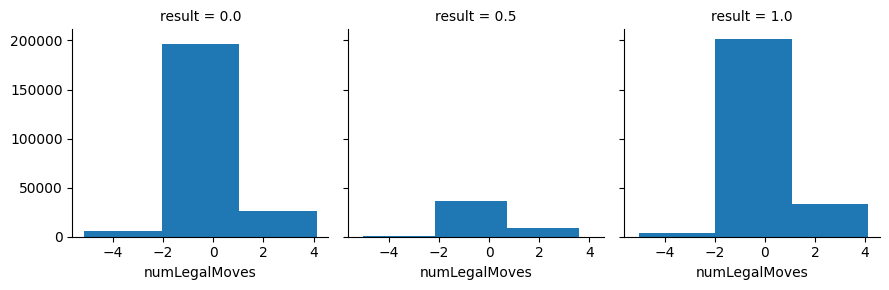

In [39]:
# Normalize numLegalMoves
train_df['numLegalMoves'] = (train_df['numLegalMoves'] - train_df['numLegalMoves'].mean()) / train_df['numLegalMoves'].std()
test_df['numLegalMoves'] = (test_df['numLegalMoves'] - test_df['numLegalMoves'].mean()) / test_df['numLegalMoves'].std()

# Graph each variable against the result
g = sns.FacetGrid(train_df, col='result')
g.map(plt.hist, 'numLegalMoves', bins=3)


In [40]:
# THIS IS ONLY TO TEST IF CHANGING RESULTS TO ANOTHER TYPE WILL MAKE A DIFFERENCE

# Change the result variable from 0 to 0, 0.5 to 1, and 1 to 2
train_df['result'] = train_df['result'].replace(0, 0)
train_df['result'] = train_df['result'].replace(0.5, 1)
train_df['result'] = train_df['result'].replace(1, 2)

In [41]:
# Make result be whole numbers
train_df['result'] = train_df['result'].astype('int64')

In [42]:
# Show the head of train_df
train_df.head()

numLegalMoves  numQueens  numPawns  whitePtV  blackPtV  ptVDiff  whiteCR  \
0       1.872726          2        14        35        35        0        1   
2       0.148893          1        16        27        27        0        2   
5       0.148893          2        10        31        32       -1        2   
8       0.546701          2        14        35        35        0        2   
9       0.148893          2        13        31        32       -1        2   

   blackCR  result  eloDiff  totalPtV totalPtVBin  newKnightPair  \
0        0       2       66        70           5              8   
2        2       2      158        54           0              7   
5        1       2      177        63           2              7   
8        2       2      -81        70           5              4   
9        1       2      146        63           2              2   

   newBishopPair  newRookPair eloDiffBin  
0              6            4          7  
2              4            4          9  
5              6            4          9  
8              7            4          3  
9              8            4          9

In [43]:
# Drop (['whitePtV', 'blackPtV', 'totalPtV', 'totalPtVBin', 'eloDiffBin'] from the training and test data
train_df = train_df.drop(['whitePtV', 'blackPtV', 'totalPtV', 'totalPtVBin', 'eloDiffBin'], axis=1)
test_df = test_df.drop(['whitePtV', 'blackPtV', 'totalPtV', 'totalPtVBin', 'eloDiffBin'], axis=1)

# Also drop whiteCR and blackCR from the training and test data
#  THIS IS ONLY BECAUSE DATA IS SEEMINGLY MESSED UP UNDELETE WHEN FIXED
# train_df = train_df.drop(['whiteCR', 'blackCR'], axis=1)
# test_df = test_df.drop(['whiteCR', 'blackCR'], axis=1)

In [44]:
# # Create a new variable called squareLegalMoves which is the square of numLegalMoves
# train_df['squareLegalMoves'] = train_df['numLegalMoves'] ** 2
# test_df['squareLegalMoves'] = test_df['numLegalMoves'] ** 2

# # Drop numLegalMoves from the training and test data
# train_df = train_df.drop(['numLegalMoves'], axis=1)
# test_df = test_df.drop(['numLegalMoves'], axis=1)

# # Show the head of train_df
# train_df.head()

In [45]:
# # Create a variable called squareEloDiff which is the square of eloDiff
# train_df['squareEloDiff'] = train_df['numPawns'] ** 2
# test_df['squareEloDiff'] = test_df['numPawns'] ** 2

# # Drop eloDiff from the training and test data
# train_df = train_df.drop(['numPawns'], axis=1)
# test_df = test_df.drop(['numPawns'], axis=1)

# # Show the head of train_df
# train_df.head()

In [46]:
# Show the head of test_df
test_df.head()

numLegalMoves  numQueens  numPawns  ptVDiff  whiteCR  blackCR  eloDiff  \
0      -0.013934          2        16        0        2        2      186   
1       2.655153          2        11        1        0        2     -172   
3      -1.348478          2        14        0        2        2     -198   
4      -0.547752          2        13       -1        1        2      -21   
5       0.519883          2        12        0        2        2       71   

   newKnightPair  newBishopPair  newRookPair  
0              4              7            4  
1              7              4            4  
3              3              6            4  
4              1              7            4  
5              7              4            4

In [47]:
# Print a correlation matrix
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [48]:
X_train = train_df.drop("result", axis=1)
Y_train = train_df["result"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((512340, 10), (512340,), (130606, 10))

In [49]:
# # Implement the decision tree
X = train_df.drop(['result'], axis=1)
y = train_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#limit the decision tree to 3 depth
# clf = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_leaf=3, min_samples_split=12)
clf = DecisionTreeClassifier(max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=12)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6120154584846


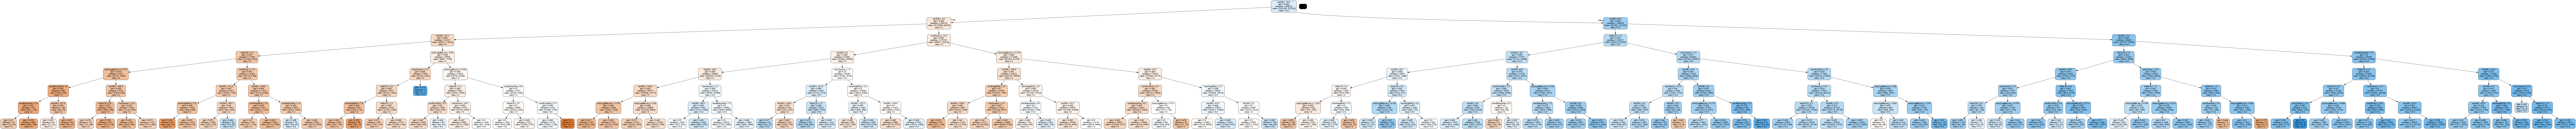

In [50]:
# Create a visualization of the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns, class_names=['0', '0.5', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [51]:
# Print the importance of each feature with labels rounded to 2 decimal places
# print(clf.feature_importances_)
# print(X_train.columns)

# Create a pd.Series of features importances
importances = pd.Series(data=clf.feature_importances_, index=X_train.columns)
#print importance in order
importances.sort_values(ascending=False, inplace=True)
print(importances)
# Output the feature_names
print(X_train.columns)

eloDiff          0.940683
ptVDiff          0.021531
numLegalMoves    0.016446
whiteCR          0.004598
blackCR          0.003241
numPawns         0.003226
newBishopPair    0.003080
numQueens        0.002978
newKnightPair    0.002969
newRookPair      0.001247
dtype: float64
Index(['numLegalMoves', 'numQueens', 'numPawns', 'ptVDiff', 'whiteCR',
       'blackCR', 'eloDiff', 'newKnightPair', 'newBishopPair', 'newRookPair'],
      dtype='object')


In [52]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.61185727 0.60701433 0.60964452 0.61287725 0.61220631]
Mean: 0.6107199383423837
Standard Deviation: 0.0021468520045479157


In [53]:
# Create a multi-way decision tree
# clf = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_leaf=3, min_samples_split=12)
#clf = DecisionTreeClassifier(max_depth=7, max_features=3, min_samples_leaf=3, min_samples_split=12)
clf = DecisionTreeClassifier(max_depth=3, max_features=6, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.610327126517547


In [54]:
# param_grid = {"min_samples_leaf" : [1, 3, 5, 6, 8], "min_samples_split" : [2, 4, 6, 8, 10, 12, 14], "max_features": [2, 3, 4, 5, 6], "max_depth": [2, 3, 5, 6, 7, 8, 10, 12, 14]}
# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(X_train, y_train)
# clf.best_params_

In [55]:
# Regress the data
# X = train_df.drop(['result'], axis=1)
# y = train_df['result']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# #limit the decision tree to 3 depth
# clf = DecisionTreeRegressor(max_depth=7)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print(accuracy_score(y_test, y_pred))


In [56]:
# Use linear regression to predict the result
# X = train_df.drop(['result'], axis=1)
# y = train_df['result']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# clf = LinearRegression()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# #rint(accuracy_score(y_test, y_pred))

In [57]:
# Create a machine learning model that allows for continuous variables
# X = train_df.drop(['result'], axis=1)
# y = train_df['result']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# clf = RandomForestRegressor(n_estimators=100)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

In [58]:
# Create a pd.Series of features importances
importances = pd.Series(data=clf.feature_importances_, index=X_train.columns)
#print importance
importances.sort_values(ascending=False, inplace=True)
print(importances)
# Output the feature_names
print(X_train.columns)

eloDiff          0.965036
numLegalMoves    0.030070
ptVDiff          0.004894
numQueens        0.000000
numPawns         0.000000
whiteCR          0.000000
blackCR          0.000000
newKnightPair    0.000000
newBishopPair    0.000000
newRookPair      0.000000
dtype: float64
Index(['numLegalMoves', 'numQueens', 'numPawns', 'ptVDiff', 'whiteCR',
       'blackCR', 'eloDiff', 'newKnightPair', 'newBishopPair', 'newRookPair'],
      dtype='object')


Text(0, 0.5, 'Predicted')

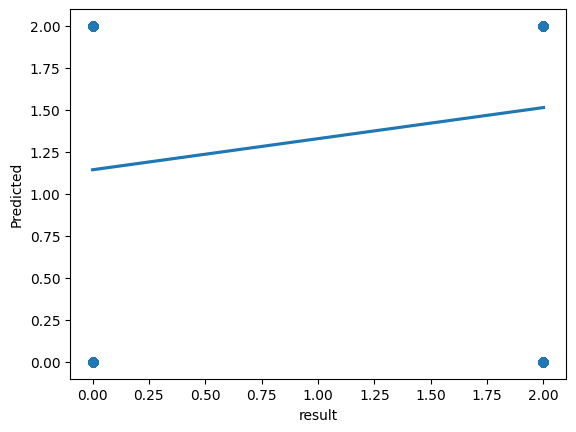

In [59]:
# Show a linear regression plot
sns.regplot(x=y_test, y=y_pred)
# Print the y axis label
plt.ylabel('Predicted')


In [60]:
# Print the features
print(X_train.columns)


Index(['numLegalMoves', 'numQueens', 'numPawns', 'ptVDiff', 'whiteCR',
       'blackCR', 'eloDiff', 'newKnightPair', 'newBishopPair', 'newRookPair'],
      dtype='object')


In [61]:
# remove eloDiff from the training and test data
train_df = train_df.drop(['numQueens'], axis=1)
test_df = test_df.drop(['numQueens'], axis=1)

In [62]:
# Use neural networks to predict the result
X = train_df.drop(['result'], axis=1)
y = train_df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.6134500526993794


<AxesSubplot:xlabel='result'>

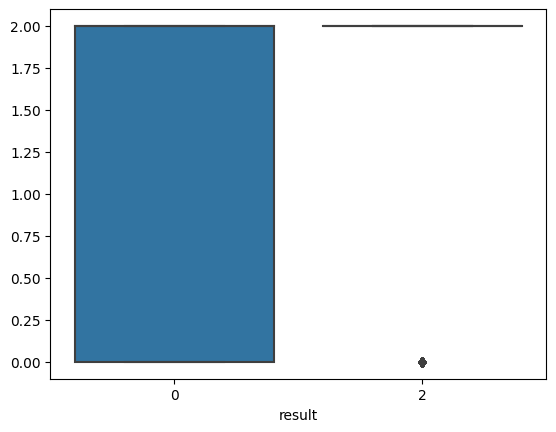

In [63]:
# Print a boxplot of the neural network
sns.boxplot(x=y_test, y=y_pred)

In [64]:
# fig = plt.figure(figsize=(15, 10))
# plot_tree(clf.estimators_[0], 
#           feature_names=X_train.columns,
#           class_names=['0', '1'],
#           filled=True, impurity=True, 
#           rounded=True)

In [65]:
# Verify the accuracy of the linear regression by applying it to the test data
y_pred = clf.predict(X_test)
# Using the model to predict the result of the first 5 games in the test data
clf.predict(X_test.head(100))

array([2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2], dtype=int64)